**Linear**

In [7]:
import random 
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
import pandas as pd
data = {
    'x' : [2,2,3,4,5] , 
    'y' : [2,4,5,4,5]
}
df = pd.DataFrame(data)

In [9]:
X = df['x'].values.reshape(-1,1)
y = df['y'].values


In [10]:
model = LinearRegression()
model.fit(X , y )

LinearRegression()

In [11]:
y_pred  = model.predict(X)


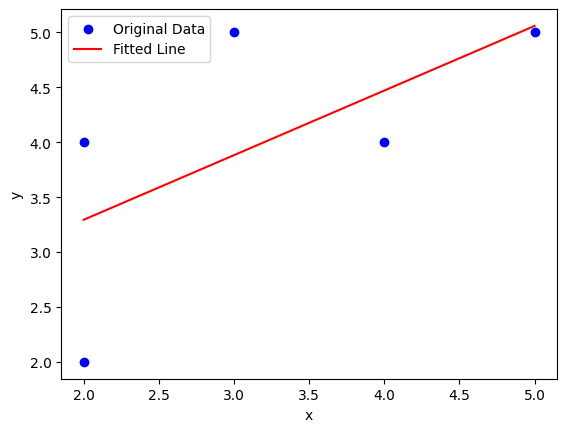

In [12]:
plt.scatter(df['x'] , df['y'] , color = 'blue' , label = 'Original Data')
plt.plot(df['x']  , y_pred , color = 'red' , label = 'Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**LOGISTIC**

In [13]:
import numpy as np
import pandas as pd 
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score , classification_report   

In [14]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data , columns = iris.feature_names)
df['target'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
df = df[df['target']!=2]


In [16]:
X = df.drop('target', axis =1)
Y = df['target']

In [17]:
X , Y

(    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                 5.1               3.5                1.4               0.2
 1                 4.9               3.0                1.4               0.2
 2                 4.7               3.2                1.3               0.2
 3                 4.6               3.1                1.5               0.2
 4                 5.0               3.6                1.4               0.2
 ..                ...               ...                ...               ...
 95                5.7               3.0                4.2               1.2
 96                5.7               2.9                4.2               1.3
 97                6.2               2.9                4.3               1.3
 98                5.1               2.5                3.0               1.1
 99                5.7               2.8                4.1               1.3
 
 [100 rows x 4 columns],
 0     0
 1     0
 2     0
 3     0
 

In [18]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y , test_size=0.3 , random_state=42)

In [19]:
model = LogisticRegression()
model.fit(X_train , Y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test)


In [21]:
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(Y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**ANN**

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer , StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [23]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']


In [24]:



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
model = Sequential()
model.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer with 16 neurons
model.add(Dense(8, activation='relu'))  # Hidden layer with 8 neurons
model.add(Dense(3, activation='softmax'))

d:\MLwork\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=1)


Epoch 1/50


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 3)

In [28]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Accuracy and classification report
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


ValueError: `axis` must be fewer than the number of dimensions (1)